# I : Data Processing

## Library Imports

In [1]:
!pip install -q ipython-sql sqlalchemy prettytable==3.8.0 networkx neo4j pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
print("Upload both the files")
uploaded = files.upload()
udf = pd.read_csv('data_task_users.csv')
rdf = pd.read_csv('data_task_related_entries_of_users.csv')

Upload both the files


Saving data_task_related_entries_of_users.csv to data_task_related_entries_of_users.csv
Saving data_task_users.csv to data_task_users.csv


In [5]:
udf.head()

,ppid,age,gender,city,visit_count,sports_with_visit_count,no_of_sports_interested,top_sport,top_sport_visits,entity_with_visit_count,...,top_sources,top_source_visits,no_of_sources,source_with_visit_count,timeonpage,first_visit_timestamp,latest_visit_timestamp,es_age,days_since_last_read_es,articles_read_last_30_days
0,7t8851731938519692e9d925a72dcb,32,female,Stone Mountain,7,"{olympics=1, nfl=2, track-and-field=1, college...",4,college-football,3,"{Others=5, Gabby Thomas=1, Sydney McLaughlin=1}",...,discover,6,2,"{internal link=1, discover=6}",60,2024-11-18 14:02:00,2025-04-05 23:21:17,223,85,0
1,7t8851731938519692e9d925a72dcb,NaN,female,Woburn,7,"{olympics=1, nfl=2, track-and-field=1, college...",4,college-football,3,"{Others=5, Gabby Thomas=1, Sydney McLaughlin=1}",...,discover,6,2,"{internal link=1, discover=6}",60,2024-11-18 14:02:00,2025-04-05 23:21:17,223,85,0
2,5w5z21726237625718d2d279b46392,70,male,Anaheim,286,"{wnba=10, golf=5, mlb=10, nfl=111, college-foo...",10,nfl,111,"{Tara Davis Woodhall=1, Sean McVay=2, Dan Quin...",...,discover,281,2,"{internal link=5, discover=281}",25,2024-09-13 14:27:06,2025-06-19 12:58:15,289,10,3
3,h5zc417341392574271945797f94ef,59,female,Painesville,15,"{wnba=1, golf=2, nba=1, nfl=5, college-footbal...",5,college-football,6,"{Others=7, Deion Sanders=2, Andy Reid=1, Tom B...",...,google news,14,2,"{google news=14, internal link=1}",52,2024-12-14 01:20:57,2025-06-27 20:08:00,197,2,5
4,h5zc417341392574271945797f94ef,77,female,Macedonia,15,"{wnba=1, golf=2, nba=1, nfl=5, college-footbal...",5,college-football,6,"{Others=7, Deion Sanders=2, Andy Reid=1, Tom B...",...,google news,14,2,"{google news=14, internal link=1}",52,2024-12-14 01:20:57,2025-06-27 20:08:00,197,2,5


## Connecting to SQLite

In [6]:
%load_ext sql
%sql sqlite://

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///temp.db', echo=False)
udf.to_sql('users', con=engine, if_exists='replace', index=False)
rdf.to_sql('related', con=engine, if_exists='replace', index=False)

5264

In [8]:
%sql sqlite:///temp.db

In [9]:
%%sql
SELECT gender, COUNT(*) AS user_count
FROM users
GROUP BY gender

   sqlite://
 * sqlite:///temp.db
Done.


gender,user_count
None,5421
female,2477
male,2097
unknown,5


## Quick Data Preview

### 1. Shape and Columns

In [10]:
print(" Overview: Shape and Columns\n" + "="*60)

print("\n Users DataFrame (udf)")
print(f"Shape: {udf.shape}")
print(f"Columns: {udf.columns.tolist()}")

print("\n User Related Data containing DataFrame (rdf)")
print(f"Shape: {rdf.shape}")
print(f"Columns: {rdf.columns.tolist()}")

 Overview: Shape and Columns

 Users DataFrame (udf)
Shape: (10000, 28)
Columns: ['ppid', 'age', 'gender', 'city', 'visit_count', 'sports_with_visit_count', 'no_of_sports_interested', 'top_sport', 'top_sport_visits', 'entity_with_visit_count', 'no_of_entity_interested', 'top_entity', 'top_entity_visits', 'latest_referrer', 'latest_sport_read', 'latest_entity_read', 'total_engagement', 'touchpoint_count', 'top_sources', 'top_source_visits', 'no_of_sources', 'source_with_visit_count', 'timeonpage', 'first_visit_timestamp', 'latest_visit_timestamp', 'es_age', 'days_since_last_read_es', 'articles_read_last_30_days']

 User Related Data containing DataFrame (rdf)
Shape: (5264, 7)
Columns: ['ppid', 'source', 'ua', 'slug', 'source_group', 'timestamp', 'date']


### 2. Summary of Datatypes within the Tables

In [11]:
print("Overview: Data Types & Non-Null Counts\n" + "="*60)

print("\n Users DataFrame (udf)")
udf.info()

print("\n Related DataFrame (rdf)")
rdf.info()

Overview: Data Types & Non-Null Counts

 Users DataFrame (udf)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ppid                        10000 non-null  object 
 1   age                         3923 non-null   object 
 2   gender                      4579 non-null   object 
 3   city                        4634 non-null   object 
 4   visit_count                 10000 non-null  int64  
 5   sports_with_visit_count     10000 non-null  object 
 6   no_of_sports_interested     10000 non-null  int64  
 7   top_sport                   10000 non-null  object 
 8   top_sport_visits            10000 non-null  int64  
 9   entity_with_visit_count     10000 non-null  object 
 10  no_of_entity_interested     10000 non-null  int64  
 11  top_entity                  7327 non-null   object 
 12  top_entity_visits         

In [12]:
udf['top_sources'].unique()

array(['discover', 'google news', 'unknown', 'google search',
       'internal link', 'facebook', 'others', 'msn', 'bing', 'reddit',
       'twitter', 'duckduckgo'], dtype=object)

In [13]:
rdf['slug'].value_counts()

,count
slug,
golf-news-an-ex-prodigy-himself-jordan-spieth-objects-to-playing-with-rising-pga-tour-star-might-try-to-stay-away,48
golf-news-tiger-woods-will-never-convince-jordan-spieth-to-join-tgl-as-his-biggest-problem-with-tech-league-revealed,36
ncaa-college-football-news-ryan-days-wife-nina-comes-clean-on-his-helplessness-after-death-threats-left-osu-hc-with-no-choice,33
ncaa-college-football-news-national-analyst-applauds-dan-lanning-for-ditching-four-m-athlete-hype-that-echoes-shedeur-sanders-noise,30
nba-active-basketball-news-golden-state-warriors-community-suddenly-love-steve-kerr-s-controversial-decision-that-left-stephen-curry-visibly-dejected-vs-portland,29
...,...
nascar-news-years-after-stepmother-teresa-slammed-the-door-dale-earnhardts-elder-son-gets-revenge-with-a-public-dig,1
nfl-legends-news-michael-strahan-confirms-sadness-in-a-powerful-message-to-america-amid-tragedy,1
nfl-active-news-national-reporter-reveals-patriots-true-intentions-behind-joe-milton-trade-as-mike-vrabel-clears-feelings-about-trading-the-qb,1


###3. Missing Values

In [14]:
print("Overview: Missing Value Summary\n" + "="*60)

def show_missing(df, name):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    print(f"\n{name}")
    display(pd.DataFrame({
        'Missing Count': missing,
        'Missing %': percent.round(2)
    }).sort_values(by='Missing Count', ascending=False))

show_missing(udf, " Users DataFrame (udf)")
show_missing(rdf, " Related DataFrame (rdf)")


Overview: Missing Value Summary

 Users DataFrame (udf)


,Missing Count,Missing %
total_engagement,8631,86.31
touchpoint_count,8631,86.31
age,6077,60.77
gender,5421,54.21
city,5366,53.66
top_entity_visits,2673,26.73
top_entity,2673,26.73
ppid,0,0.00
top_sport,0,0.00
visit_count,0,0.00



 Related DataFrame (rdf)


,Missing Count,Missing %
ppid,0,0.0
source,0,0.0
ua,0,0.0
slug,0,0.0
source_group,0,0.0
timestamp,0,0.0
date,0,0.0


In [15]:
udf['top_sources'].value_counts()

,count
top_sources,
google search,4409
discover,3480
unknown,502
google news,488
internal link,460
facebook,237
msn,162
others,149
reddit,70


In [16]:
udf['source_with_visit_count'].value_counts()

,count
source_with_visit_count,
{google search=2},837
{discover=2},570
{google search=3},381
{discover=3},261
"{google search=1, internal link=1}",224
...,...
"{internal link=3, discover=35, google search=1}",1
"{internal link=3, msn=6, twitter=2}",1
"{internal link=13, google news=3, discover=21, google search=2}",1


###4. Duplicate Rows

In [17]:
print(" Overview: Duplicate Rows\n" + "="*60)

print(f" Duplicate Rows in udf: {udf.duplicated().sum()}")
print(f" Duplicate Rows in rdf: {rdf.duplicated().sum()}")


 Overview: Duplicate Rows
 Duplicate Rows in udf: 24
 Duplicate Rows in rdf: 2696


### 5. Number of Unique Users

In [18]:
print(" Overview: Unique Users\n" + "="*60)

if 'ppid' in udf.columns:
    print(f" Unique PPIDs in udf: {udf['ppid'].nunique()}")

if 'ppid' in rdf.columns:
    print(f" Unique PPIDs in rdf: {rdf['ppid'].nunique()}")


 Overview: Unique Users
 Unique PPIDs in udf: 8813
 Unique PPIDs in rdf: 831


### 6. Descriptive Statistics

In [19]:
print(" Overview: Descriptive Statistics\n" + "="*60)

print("\n Users DataFrame (udf)")
display(udf.describe(include='all').T)

print("\n Related DataFrame (rdf)")
display(rdf.describe(include='all').T)


 Overview: Descriptive Statistics

 Users DataFrame (udf)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ppid,10000,8813,5b7px17342887328668bffa1e2ccb0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,3923,85,65,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,4579,3,female,2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,4634,2341,Chicago,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_count,10000.0,NaN,NaN,NaN,14.9529,33.170027,2.0,2.0,5.0,12.0,675.0
sports_with_visit_count,10000,4046,{nfl=2},492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_sports_interested,10000.0,NaN,NaN,NaN,2.8218,2.302428,1.0,1.0,2.0,4.0,17.0
top_sport,10000,21,nfl,2980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top_sport_visits,10000.0,NaN,NaN,NaN,8.7648,19.031597,1.0,2.0,3.0,8.0,654.0
entity_with_visit_count,10000,4284,{Others=2},1392,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Related DataFrame (rdf)


,count,unique,top,freq
ppid,5264,831,rj45w1714238809072ff9f34835c75,308
source,5264,70,related_post | website | related_1,1261
ua,5264,264,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,322
slug,5264,1544,golf-news-an-ex-prodigy-himself-jordan-spieth-...,48
source_group,5264,4,Related Post,4361
timestamp,5264,2564,2025-03-01 21:49:52,12
date,5264,177,2025-02-20,115


In [20]:
rdf['slug'].value_counts()

,count
slug,
golf-news-an-ex-prodigy-himself-jordan-spieth-objects-to-playing-with-rising-pga-tour-star-might-try-to-stay-away,48
golf-news-tiger-woods-will-never-convince-jordan-spieth-to-join-tgl-as-his-biggest-problem-with-tech-league-revealed,36
ncaa-college-football-news-ryan-days-wife-nina-comes-clean-on-his-helplessness-after-death-threats-left-osu-hc-with-no-choice,33
ncaa-college-football-news-national-analyst-applauds-dan-lanning-for-ditching-four-m-athlete-hype-that-echoes-shedeur-sanders-noise,30
nba-active-basketball-news-golden-state-warriors-community-suddenly-love-steve-kerr-s-controversial-decision-that-left-stephen-curry-visibly-dejected-vs-portland,29
...,...
nascar-news-years-after-stepmother-teresa-slammed-the-door-dale-earnhardts-elder-son-gets-revenge-with-a-public-dig,1
nfl-legends-news-michael-strahan-confirms-sadness-in-a-powerful-message-to-america-amid-tragedy,1
nfl-active-news-national-reporter-reveals-patriots-true-intentions-behind-joe-milton-trade-as-mike-vrabel-clears-feelings-about-trading-the-qb,1


In [21]:
udf['latest_referrer'].value_counts()

,count
latest_referrer,
android-app://com.google.android.googlequicksearchbox/,3162
https://www.google.com/,2583
https://www.google.com,1285
unknown,859
https://news.google.com/,458
...,...
https://www.essentiallysports.com/nba-active-basketball-news-separated-by-two-thousand-and-eight-hundred-and-ten-miles-ayesha-curry-cannot-stop-blushing-for-stephen-curry-amid-emotional-confession/,1
https://www.essentiallysports.com/nfl-legends-news-julian-edelman-confirms-dads-role-in-retiring-from-nfl-after-sharing-his-emotional-reaction-to-hof-induction/?utm_source=new_related_post&utm_campaign=new_related_3,1
https://www.essentiallysports.com/nfl-active-news-patrick-mahomes-mom-randi-fires-shots-at-chicago-bears-as-hc-ben-johnson-cleans-house-with-five-exits/,1


### 7. Parsing JSON like columns

In [22]:
print(" Overview: JSON-like Columns\n" + "="*60)

def check_json_columns(df, name):
    json_cols = []
    for col in df.select_dtypes(include='object').columns:
        try:
            if df[col].dropna().astype(str).str.strip().str.startswith('{').any():
                json_cols.append(col)
        except:
            continue

    print(f"\n{name}")
    if json_cols:
        for col in json_cols:
            print(f"   • Sample from `{col}`:")
            display(df[col].dropna().sample(1).values)
    else:
        print("   None detected.")

check_json_columns(udf, " Users DataFrame (udf)")
check_json_columns(rdf, " Related DataFrame (rdf)")

 Overview: JSON-like Columns

 Users DataFrame (udf)
   • Sample from `sports_with_visit_count`:


array(['{nfl=5, college-football=2}'], dtype=object)

   • Sample from `entity_with_visit_count`:


array(['{Others=47, Serena Williams=3, Dan Campbell=1, Nelly Korda=1, Tom Brady=1, Shohei Ohtani=1, John Harbaugh=1, Derek Jeter=1, Tiger Woods=2, Patrick Mahomes=1, Simone Biles=1}'],
      dtype=object)

   • Sample from `touchpoint_count`:


array(['{quiz=17, poll=17}'], dtype=object)

   • Sample from `source_with_visit_count`:


array(['{google search=2}'], dtype=object)


 Related DataFrame (rdf)
   None detected.


## Data Cleaning and Processing

In [23]:
udf1 = udf.copy()
rdf1 = rdf.copy()

To do:
- correcting datatypes of age, dates etc from object datatype to suitable ones
- flattening json formatted cols
- missing, dropping or imputing


#### Correcting datatypes of age, dates etc from object datatype to suitable ones

In [24]:
# Convert datetime columns in udf
udf1['first_visit_timestamp'] = pd.to_datetime(udf1['first_visit_timestamp'], errors='coerce')
udf1['latest_visit_timestamp'] = pd.to_datetime(udf1['latest_visit_timestamp'], errors='coerce')

# Convert age to numeric (int), coercing errors
udf1['age'] = pd.to_numeric(udf1['age'], errors='coerce').astype('Int64')

# Convert datetime column in rdf
rdf1['timestamp'] = pd.to_datetime(rdf1['timestamp'], errors='coerce')

#### Working with json formatted cols

In [25]:
import ast
import re

# Parser Function
def parse_visit_dict(s):
    if pd.isna(s):
        return {}
    try:
        # Replacing '=' with ':'
        s = s.replace('=', ':')


        s = re.sub(r'([\w\- ]+):', r'"\1":', s)

        return ast.literal_eval(s)
    except:
        return {}

In [26]:
visit = [
    'sports_with_visit_count',
    'entity_with_visit_count',
    'source_with_visit_count'
]

for col in visit:
    udf1[col + '_dict'] = udf1[col].apply(parse_visit_dict)

In [27]:
# only top results from each dict
udf1['most_viewed_sport'] = udf1['sports_with_visit_count_dict'].apply(lambda d: max(d, key=d.get) if d else None)
udf1['sports_with_visit_count'] = udf1['sports_with_visit_count_dict'].apply(lambda d: max(d.values()) if d else None)

udf1['most_viewed_entity'] = udf1['entity_with_visit_count_dict'].apply(lambda d: max(d, key=d.get) if d else None)
udf1['entity_with_visit_count'] = udf1['entity_with_visit_count_dict'].apply(lambda d: max(d.values()) if d else None)

udf1['most_viewed_source'] = udf1['source_with_visit_count_dict'].apply(lambda d: max(d, key=d.get) if d else None)
udf1['source_with_visit_count'] = udf1['source_with_visit_count_dict'].apply(lambda d: max(d.values()) if d else None)

In [28]:
udf1.isnull().sum()

,0
ppid,0
age,6086
gender,5421
city,5366
visit_count,0
sports_with_visit_count,0
no_of_sports_interested,0
top_sport,0
top_sport_visits,0
entity_with_visit_count,0


### Missing, Dropping and Imputation

In [29]:
# Dropping columns
udf1 = udf1.drop(columns=['total_engagement', 'touchpoint_count'])

# Impute age with median
udf1['age'] = udf1['age'].fillna(int(udf1['age'].median())).astype('Int64')

# Impute gender
udf1['gender'] = udf1['gender'].fillna('unknown')

# Impute city
udf1['city'] = udf1['city'].fillna('unknown')

# Impute top_entity and top_entity_visits
udf1['top_entity'] = udf1['top_entity'].fillna('unknown')
udf1['top_entity_visits'] = udf1['top_entity_visits'].fillna(0).astype(int)

In [30]:
udf1.isnull().sum()

,0
ppid,0
age,0
gender,0
city,0
visit_count,0
sports_with_visit_count,0
no_of_sports_interested,0
top_sport,0
top_sport_visits,0
entity_with_visit_count,0


In [31]:
udf1.head()

,ppid,age,gender,city,visit_count,sports_with_visit_count,no_of_sports_interested,top_sport,top_sport_visits,entity_with_visit_count,...,latest_visit_timestamp,es_age,days_since_last_read_es,articles_read_last_30_days,sports_with_visit_count_dict,entity_with_visit_count_dict,source_with_visit_count_dict,most_viewed_sport,most_viewed_entity,most_viewed_source
0,7t8851731938519692e9d925a72dcb,32,female,Stone Mountain,7,3,4,college-football,3,5,...,2025-04-05 23:21:17,223,85,0,"{'olympics': 1, ' nfl': 2, ' track-and-field':...","{'Others': 5, ' Gabby Thomas': 1, ' Sydney McL...","{'internal link': 1, ' discover': 6}",college-football,Others,discover
1,7t8851731938519692e9d925a72dcb,60,female,Woburn,7,3,4,college-football,3,5,...,2025-04-05 23:21:17,223,85,0,"{'olympics': 1, ' nfl': 2, ' track-and-field':...","{'Others': 5, ' Gabby Thomas': 1, ' Sydney McL...","{'internal link': 1, ' discover': 6}",college-football,Others,discover
2,5w5z21726237625718d2d279b46392,70,male,Anaheim,286,111,10,nfl,111,179,...,2025-06-19 12:58:15,289,10,3,"{'wnba': 10, ' golf': 5, ' mlb': 10, ' nfl': 1...","{'Tara Davis Woodhall': 1, ' Sean McVay': 2, '...","{'internal link': 5, ' discover': 281}",nfl,Others,discover
3,h5zc417341392574271945797f94ef,59,female,Painesville,15,6,5,college-football,6,7,...,2025-06-27 20:08:00,197,2,5,"{'wnba': 1, ' golf': 2, ' nba': 1, ' nfl': 5, ...","{'Others': 7, ' Deion Sanders': 2, ' Andy Reid...","{'google news': 14, ' internal link': 1}",college-football,Others,google news
4,h5zc417341392574271945797f94ef,77,female,Macedonia,15,6,5,college-football,6,7,...,2025-06-27 20:08:00,197,2,5,"{'wnba': 1, ' golf': 2, ' nba': 1, ' nfl': 5, ...","{'Others': 7, ' Deion Sanders': 2, ' Andy Reid...","{'google news': 14, ' internal link': 1}",college-football,Others,google news


In [32]:
%load_ext sql
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


- Sql doesnt seem to accept dictionary type attributes.

- So I have decided to put them to original form and work just for the EDA part of it.

In [33]:
import json

for col in ['sports_with_visit_count_dict', 'entity_with_visit_count_dict', 'source_with_visit_count_dict']:
    udf1[col] = udf1[col].apply(json.dumps)

In [34]:
engine = create_engine('sqlite:///temp.db', echo=False)
udf1.to_sql('users1', con=engine, if_exists='replace', index=False)
rdf1.to_sql('related1', con=engine, if_exists='replace', index=False)

5264

In [35]:
%sql sqlite:///temp.db

#II. USER ENGAGEMENT ANALYSIS

I will be using SQL specifically for this. And ofc, Python for the visualizations.

### SQL Based EDA

#### 1. User Engagement per Sport

- Avg time spent and visit count per sport, identifying which sport / entity drives higher engagement.

In [36]:
%%sql
SELECT
    top_sport,
    ROUND(AVG(timeonpage),2) AS avg_time_on_page,
    ROUND(AVG(visit_count),2) AS avg_visit_count,
    COUNT(DISTINCT ppid) AS unique_users
FROM users1
GROUP BY top_sport
ORDER BY avg_time_on_page DESC;

   sqlite://
 * sqlite:///temp.db
Done.


top_sport,avg_time_on_page,avg_visit_count,unique_users
boxing,142.59,6.5,187
wnba,128.1,14.51,143
nascar,124.18,19.61,521
college-basketball,122.19,10.19,277
tennis,121.62,15.4,286
soccer,118.5,12.7,18
others,118.2,3.56,23
college-football,117.75,19.88,1093
nba,117.72,15.05,1035
f1,117.33,2.5,18


- Boxing, WNBA, and NASCAR have the highest average time on page, suggesting
users spend more time engaging with content related to these sports.

- College-football, Golf, and Track-and-field have the highest average visit counts.

- NFL has the highest number of unique users, indicating a broad interest base.

- Some sports like Swimming and Bodybuilding have very low unique user counts, which could indicate a niche interest or less content available.

#### 2. Click Through Rate (CTR)

- What articles in the Related Posts widget receive the most clicks, indicating their relevance.

In [37]:
%%sql
SELECT
    slug,
    COUNT(*) AS click_count,
    COUNT(DISTINCT ppid) AS unique_users,
    ROUND(CAST(COUNT(*) AS REAL) / COUNT(DISTINCT ppid), 2) AS avg_clicks_per_user
FROM related1
WHERE source LIKE 'related_post%'
GROUP BY slug
ORDER BY click_count DESC
LIMIT 10;

   sqlite://
 * sqlite:///temp.db
Done.


slug,click_count,unique_users,avg_clicks_per_user
golf-news-an-ex-prodigy-himself-jordan-spieth-objects-to-playing-with-rising-pga-tour-star-might-try-to-stay-away,48,1,48.0
golf-news-tiger-woods-will-never-convince-jordan-spieth-to-join-tgl-as-his-biggest-problem-with-tech-league-revealed,36,1,36.0
ncaa-college-football-news-national-analyst-applauds-dan-lanning-for-ditching-four-m-athlete-hype-that-echoes-shedeur-sanders-noise,30,1,30.0
nba-active-basketball-news-golden-state-warriors-community-suddenly-love-steve-kerr-s-controversial-decision-that-left-stephen-curry-visibly-dejected-vs-portland,29,3,9.67
ncaa-college-football-news-cam-skattebos-girlfriend-chloe-sends-emotional-five-word-message-as-he-breaks-into-tears-after-five-thirteen-giants-move,28,2,14.0
ncaa-college-football-news-insider-breaks-silence-on-marcus-freeman-and-notre-dames-intentions-after-losing-chad-bowden-to-usc,24,1,24.0
ncaa-college-basketball-news-not-bad-coaching-john-calipari-makes-honest-admission-on-what-exactly-caused-arkansas-march-madness-exit,24,1,24.0
ncaa-college-basketball-news-ncaa-broadcasters-insane-revelation-about-john-calipari-sends-shockwaves-through-arkansas-community,24,1,24.0
golf-news-justin-thomas-secretly-enjoyed-watching-rory-mcilroy-struggle-during-masters-final-round-i-was-glued,24,1,24.0
wnba-basketball-news-national-analyst-asserts-belief-that-twenty-twenty-five-wnba-draft-could-buck-historical-trend-in-major-paige-bueckers-upset,20,1,20.0


- We observe that click rates are higher in this case for golf-related news, the highest click_count being 48.

#### 3. Engagement per Source

- Sources (such as discover, internal link) drive the most traffic and engagement.

In [38]:
%%sql

SELECT
    top_sources,
    SUM(top_source_visits) AS total_visits,
    ROUND(AVG(timeonpage),2) AS avg_time_on_page
FROM users1
GROUP BY top_sources
ORDER BY total_visits DESC;

   sqlite://
 * sqlite:///temp.db
Done.


top_sources,total_visits,avg_time_on_page
discover,63315,85.53
google search,50552,117.09
google news,5709,109.99
unknown,4169,157.96
internal link,2383,169.86
facebook,1252,97.78
others,1247,95.45
msn,777,155.54
reddit,222,83.53
duckduckgo,38,105.29


- ```discover``` and ```google search``` are the top sources in terms of total visits by a significant margin.

- While ```discover``` has the highest total visits (63315), ```google search``` has a higher average time on page (117.09) compared to ```discover``` (85.53).

- Sources like ```internal link``` and ```msn``` have relatively lower total visits but higher average time on page (169.86 and 155.54 respectively).

- Some sources like ```swimming``` and ```bodybuilding``` have very low total visits, aligning with the previous observation from the "User Engagement per Sport" analysis that these are niche interests.

#### 4. Users per Site Activity

- Users into high, medium, and low activity groups based on visit count.

In [39]:
%%sql

SELECT
    CASE
        WHEN visit_count > 10 THEN 'High Site Activity'
        WHEN visit_count BETWEEN 5 AND 10 THEN 'Medium Site Activity'
        ELSE 'Low Site Activity'
    END AS activity_level,
    COUNT(DISTINCT ppid) AS user_count,
    ROUND(AVG(timeonpage),3) AS avg_time_on_page
FROM users1
GROUP BY activity_level;

   sqlite://
 * sqlite:///temp.db
Done.


activity_level,user_count,avg_time_on_page
High Site Activity,1986,98.238
Low Site Activity,4805,117.273
Medium Site Activity,2022,107.993


- Interestingly, the 'Low Site Activity' group has the highest average time on page (117.273), followed by 'Medium Site Activity' (107.993), and then 'High Site Activity' (98.238).

- This suggests that users who visit less frequently tend to spend more time on the site during each visit compared to those who visit more often.

#### 5. User Interaction Per Sports Article

- What category of sport article might lead to longer time on the site?

In [40]:
%%sql

SELECT
    u.top_sport,
    COUNT(r.ppid) AS related_post_clicks,
    ROUND(AVG(u.timeonpage),2) AS avg_time_on_page,
    ROUND((AVG(u.timeonpage) * 1.0 / COUNT(r.ppid)),2) AS avg_time_per_click
FROM users1 u
INNER JOIN related1 r
    ON u.ppid = r.ppid
WHERE r.source LIKE 'related_post%'
GROUP BY u.top_sport
ORDER BY avg_time_per_click DESC;

   sqlite://
 * sqlite:///temp.db
Done.


top_sport,related_post_clicks,avg_time_on_page,avg_time_per_click
others,3,294.0,98.0
soccer,2,152.0,76.0
swimming,6,167.0,27.83
bodybuilding,4,75.0,18.75
wwe,4,57.5,14.38
gymnastics,19,114.05,6.0
track-and-field,15,75.13,5.01
boxing,58,183.34,3.16
olympics,173,227.42,1.31
mlb,127,157.68,1.24


- Sports like 'others' (3 clicks, 294.0 avg time on page, 98.0 avg time per click),
- 'soccer' (2 clicks, 152.0 avg time on page, 76.0 avg time per click), and
- 'swimming' (6 clicks, 167.0 avg time on page, 27.83 avg time per click) show a higher average time spent per click, even with fewer related post clicks, suggesting deeper engagement when clicked.

- Sports like 'golf' (1679 clicks, 172.66 avg time on page, 0.1 avg time per click),
- 'nfl' (1427 clicks, 157.4 avg time on page, 0.11 avg time per click), and
- 'college-football' (1576 clicks, 160.37 avg time on page, 0.1 avg time per click) have a high number of related post clicks but significantly lower average time spent per click, indicating a pattern of clicking on more articles but spending less time on each one.

### Python Based Visuals

In [41]:
query = """
SELECT
    u.top_sport,
    COUNT(r.ppid) AS related_post_clicks,
    AVG(u.timeonpage) AS avg_time_on_page,
    (AVG(u.timeonpage) * 1.0 / COUNT(r.ppid)) AS avg_time_per_click
FROM users1 u
INNER JOIN related1 r
    ON u.ppid = r.ppid
WHERE r.source LIKE 'related_post%'
GROUP BY u.top_sport
ORDER BY avg_time_per_click DESC;
"""
derived_df = pd.read_sql_query(query, con = engine)
derived_df

,top_sport,related_post_clicks,avg_time_on_page,avg_time_per_click
0,others,3,294.000000,98.000000
1,soccer,2,152.000000,76.000000
2,swimming,6,167.000000,27.833333
3,bodybuilding,4,75.000000,18.750000
4,wwe,4,57.500000,14.375000
5,gymnastics,19,114.052632,6.002770
6,track-and-field,15,75.133333,5.008889
7,boxing,58,183.344828,3.161118
8,olympics,173,227.421965,1.314578
9,mlb,127,157.677165,1.241552


#### 6. Bar Plot: Average Time per Related Post Click by Top Sport

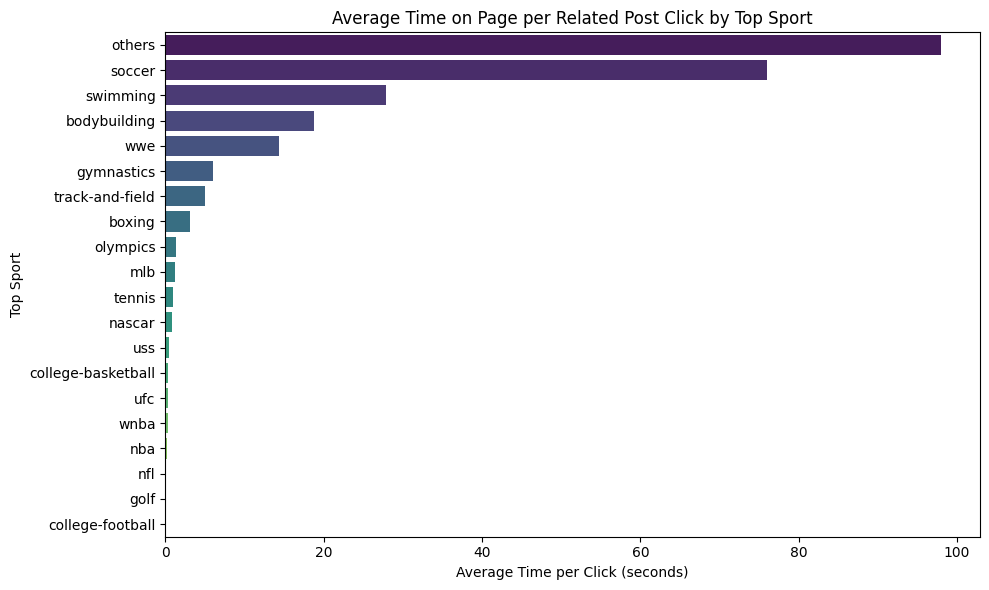

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=derived_df, x='avg_time_per_click', y='top_sport', hue='top_sport', legend=False, palette='viridis')
plt.title('Average Time on Page per Related Post Click by Top Sport')
plt.xlabel('Average Time per Click (seconds)')
plt.ylabel('Top Sport')
plt.tight_layout()
plt.savefig('time_per_click_by_sport.png')
plt.show()

####7. Scatter Plot: Visit Count vs. Number of Sports Interested

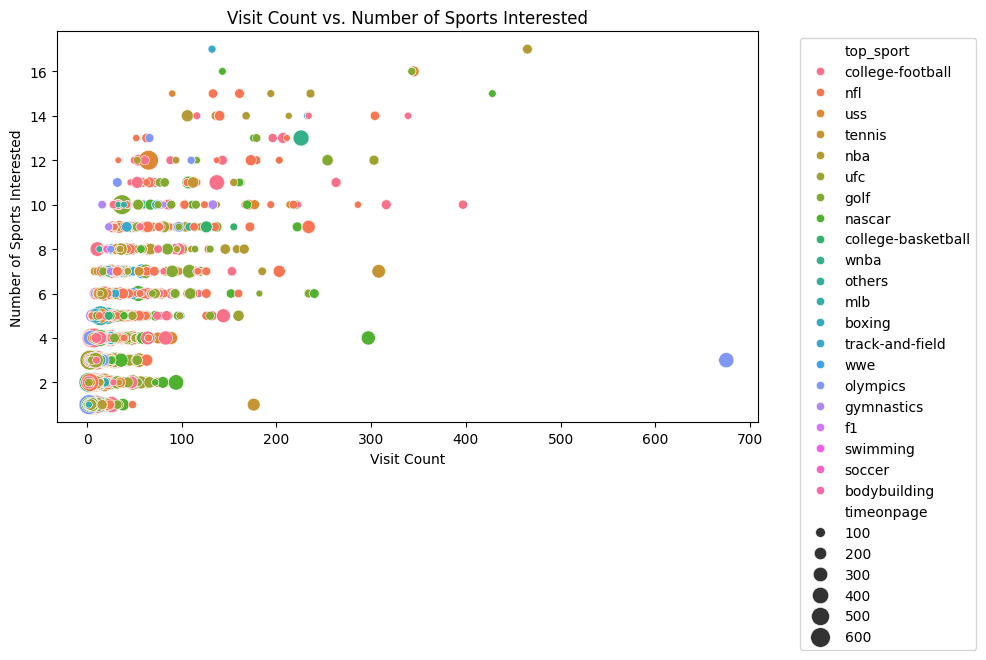

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=udf1, x='visit_count', y='no_of_sports_interested', hue='top_sport', size='timeonpage', sizes=(20, 200))
plt.title('Visit Count vs. Number of Sports Interested')
plt.xlabel('Visit Count')
plt.ylabel('Number of Sports Interested')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('visit_vs_sports_interested.png')
plt.show()


####8. Box Plot: Time on Page by Top Source

/tmp/ipython-input-44-2447487554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=udf1, x='top_sources', y='timeonpage', palette='Set2')


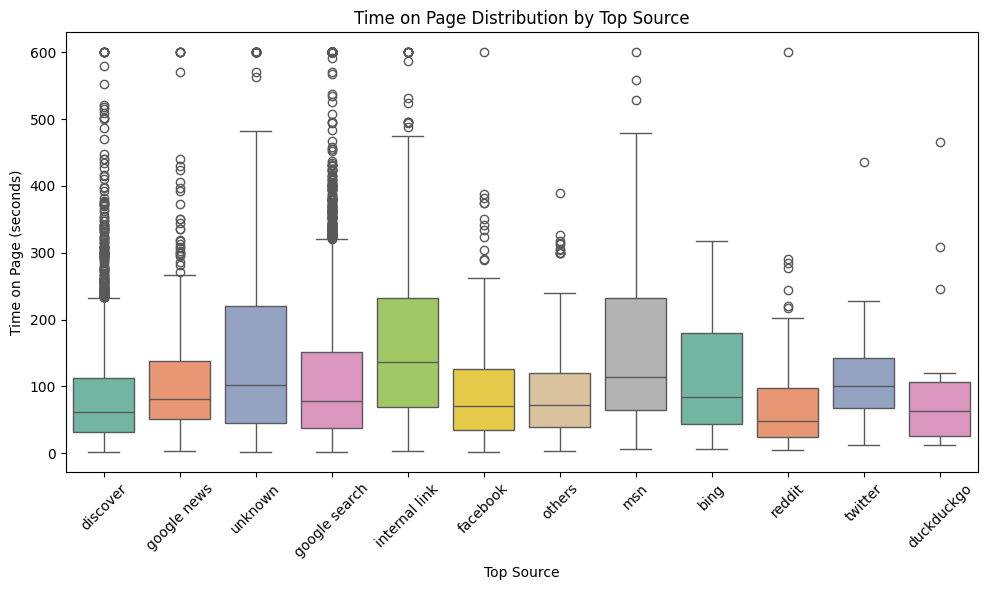

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=udf1, x='top_sources', y='timeonpage', palette='Set2')
plt.title('Time on Page Distribution by Top Source')
plt.xlabel('Top Source')
plt.ylabel('Time on Page (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('timeonpage_by_source.png')
plt.show()


#### 9. Heatmap: Correlation Between Numeric Columns

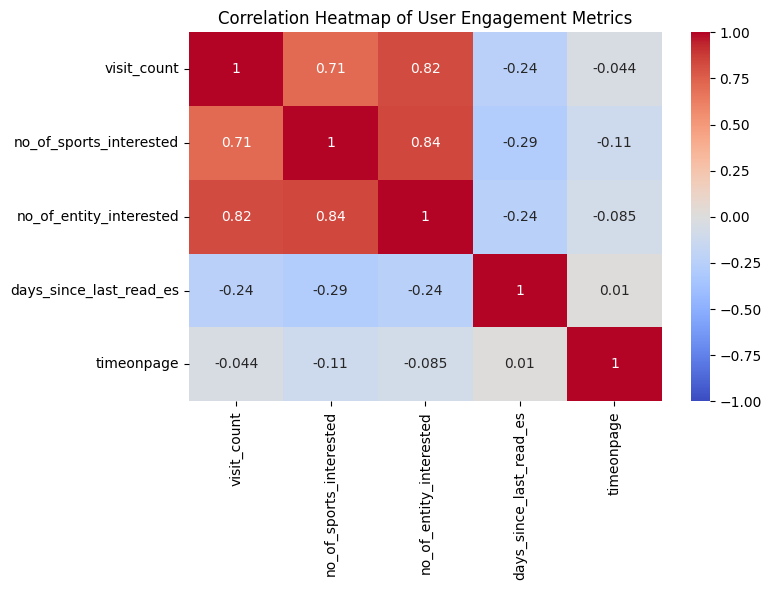

In [45]:
# Select numeric columns
numeric_cols = ['visit_count', 'no_of_sports_interested', 'no_of_entity_interested', 'days_since_last_read_es', 'timeonpage']
corr_matrix = udf1[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of User Engagement Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


####10. Line Plot: Days Since Last Read vs. Average Time per Click

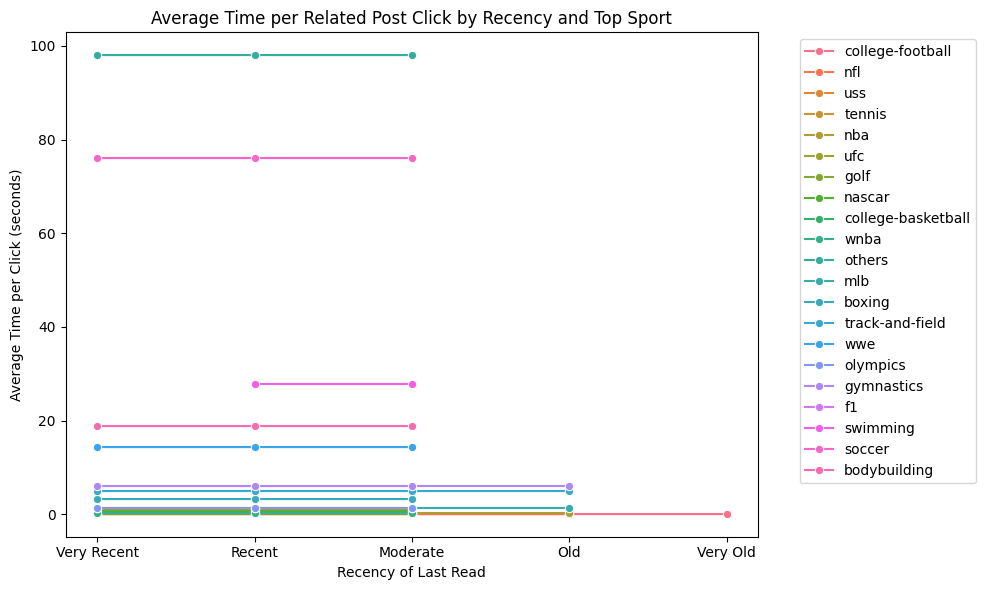

In [46]:
# Merge derived metric with users data
merged_df = udf1.merge(derived_df[['top_sport', 'avg_time_per_click']], on='top_sport', how='left')

# Bin days_since_last_read_es
merged_df['recency_bin'] = pd.cut(merged_df['days_since_last_read_es'], bins=5, labels=['Very Recent', 'Recent', 'Moderate', 'Old', 'Very Old'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='recency_bin', y='avg_time_per_click', hue='top_sport', marker='o')
plt.title('Average Time per Related Post Click by Recency and Top Sport')
plt.xlabel('Recency of Last Read')
plt.ylabel('Average Time per Click (seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('recency_vs_time_per_click.png')
plt.show()


### Graph related extractions

#### Regex Extractor

In [47]:
import spacy
rdf1['slug_clean'] = rdf1['slug'].str.replace('[^a-zA-Z0-9\-]', '', regex=True).fillna('')
rdf1['slug_text'] = rdf1['slug_clean'].str.replace('-', ' ')

#### Defining Spacy Extractor

In [48]:
# If not already installed:
# !python -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')

# Custom entity extractor
def extract_entities(text):
    doc = nlp(text)
    people = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    orgs = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return people, orgs

#### Using NER

In [49]:
rdf1[['persons', 'orgs']] = rdf1['slug_text'].apply(lambda x: pd.Series(extract_entities(x)))

#### Deriving Sport spoken about from Slug

In [50]:
rdf1['sport_from_slug'] = rdf1['slug'].str.extract(r'^([^-]+)', expand=False).str.upper()

#### Final Cleanup

In [51]:
rdf1['persons'] = rdf1['persons'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
rdf1['orgs'] = rdf1['orgs'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In [52]:
rdf1.head()

,ppid,source,ua,slug,source_group,timestamp,date,slug_clean,slug_text,persons,orgs,sport_from_slug
0,xsqzw1736390794424d2415b0fc209,related_post | website | related_6,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,nfl-active-news-maxx-crosby-withdraws-antonio-...,Related Post,2025-01-09 02:54:44,2025-01-09,nfl-active-news-maxx-crosby-withdraws-antonio-...,nfl active news maxx crosby withdraws antonio ...,antonio pierce,nfl active news maxx,NFL
1,xsqzw1736390794424d2415b0fc209,related_post | website | related_6,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,nfl-active-news-maxx-crosby-withdraws-antonio-...,Related Post,2025-01-09 02:54:45,2025-01-09,nfl-active-news-maxx-crosby-withdraws-antonio-...,nfl active news maxx crosby withdraws antonio ...,antonio pierce,nfl active news maxx,NFL
2,vhfgl17296469915862fe5e3a93c1b,related_post | website | related_6,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,mlb-baseball-news-blake-snell-reveals-his-one-...,Related Post,2025-01-09 03:38:07,2025-01-09,mlb-baseball-news-blake-snell-reveals-his-one-...,mlb baseball news blake snell reveals his one ...,andrew friedman,mlb baseball news blake snell,MLB
3,vhfgl17296469915862fe5e3a93c1b,related_post | website | related_6,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,mlb-baseball-news-blake-snell-reveals-his-one-...,Related Post,2025-01-09 03:38:07,2025-01-09,mlb-baseball-news-blake-snell-reveals-his-one-...,mlb baseball news blake snell reveals his one ...,andrew friedman,mlb baseball news blake snell,MLB
4,vhfgl17296469915862fe5e3a93c1b,related_post | website | related_6,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,mlb-baseball-news-blake-snell-reveals-his-one-...,Related Post,2025-01-09 03:38:07,2025-01-09,mlb-baseball-news-blake-snell-reveals-his-one-...,mlb baseball news blake snell reveals his one ...,andrew friedman,mlb baseball news blake snell,MLB


# III. Novel Metric Suggestion

## Non Graph Metrics

### TSS (Top Sport Stickiness)

- Measures how concentrated a user's engagement is on their favorite sport, calculated as top_sport_visits / visit_count.



In [53]:
# Avoid division by zero
udf1['TSS'] = udf1['top_sport_visits'] / udf1['visit_count'].replace(0, pd.NA)

# Fill NaN with 0
udf1['TSS'] = udf1['TSS'].fillna(0)

# display
udf1[['ppid', 'top_sport', 'top_sport_visits', 'visit_count', 'TSS']].head()

,ppid,top_sport,top_sport_visits,visit_count,TSS
0,7t8851731938519692e9d925a72dcb,college-football,3,7,0.428571
1,7t8851731938519692e9d925a72dcb,college-football,3,7,0.428571
2,5w5z21726237625718d2d279b46392,nfl,111,286,0.388112
3,h5zc417341392574271945797f94ef,college-football,6,15,0.400000
4,h5zc417341392574271945797f94ef,college-football,6,15,0.400000


###  SLI (Source Loyalty Index)

- Quantifies how consistently a user visits from their most frequent traffic source (e.g., Discover, Internal Link), as a ratio of top source visits to total visits.

In [54]:
# SLI = top_source_visits / visit_count (avoid division by zero)
udf1['SLI'] = udf1['top_source_visits'] / udf1['visit_count'].replace(0, pd.NA)

# Optional: Fill missing values if desired
udf1['SLI'] = udf1['SLI'].fillna(0)

# Preview result
udf1[['ppid', 'top_sources', 'top_source_visits', 'visit_count', 'SLI']].head()

,ppid,top_sources,top_source_visits,visit_count,SLI
0,7t8851731938519692e9d925a72dcb,discover,6,7,0.857143
1,7t8851731938519692e9d925a72dcb,discover,6,7,0.857143
2,5w5z21726237625718d2d279b46392,discover,281,286,0.982517
3,h5zc417341392574271945797f94ef,google news,14,15,0.933333
4,h5zc417341392574271945797f94ef,google news,14,15,0.933333


## Graph Inspired Metrics

#### 1. UPEC (User–Person Engagement Centrality)

- Measures how many distinct people (athletes, celebrities) a user has interacted with in articles.

In [55]:
import networkx as nx

##### Coding

In [56]:
rdf1_people = rdf1[['ppid', 'persons']].explode('persons').dropna()
rdf1_people['persons'] = rdf1_people['persons'].str.strip().str.title()

upec = (
    rdf1_people
    .groupby('ppid')['persons']
    .nunique()
    .reset_index(name='UPEC')  # User–Person Engagement Centrality
)
upec

,ppid,UPEC
0,25vbc1727646358116df69206bf3b5,3
1,27g8z1738357314117b68901d7bcc0,1
2,285lz17493944596834f32e2f1a0a3,1
3,28g9z173649453964998be4d197daf,1
4,29q8w173675135060052f2b5db3c24,2
...,...,...
826,zw8q81742991976795150ca66e6230,1
827,zxdkb1736170916294dd80aa9a21c1,2
828,zxhzh1746387398386d7487c49c30a,1
829,zxnbh1747248265636f63f4b80a6d9,2


##### UPEC Graph Visualization

In [57]:
# graph
G = nx.Graph()
G.add_nodes_from(rdf1_people['ppid'].unique(), node_type='user')
G.add_nodes_from(rdf1_people['persons'].unique(), node_type='person')
G.add_edges_from(zip(rdf1_people['ppid'], rdf1_people['persons']))

In [58]:
# Sample a small subgraph
sample_users = list(rdf1_people['ppid'].unique()[:10])
sample_persons = set()
for u in sample_users:
    if u in G:
        sample_persons.update(G.neighbors(u))
sample_nodes = sample_users + list(sample_persons)
H = G.subgraph(sample_nodes)


In [59]:
# Positioning
pos = nx.spring_layout(H, k=0.8, seed=42)

# Separate node types
user_nodes = [n for n in H.nodes if H.nodes[n]['node_type'] == 'user']
person_nodes = [n for n in H.nodes if H.nodes[n]['node_type'] == 'person']

{'': Text(0.3054618764311669, 0.06505962999265844, ''),
 'rj45w1714238809072ff9f34835c75': Text(-0.0832689556536954, -0.19634225839465289, 'rj45w1714238809072ff9f34835c75'),
 'Mike Mccarthys Jerry Jones': Text(-0.6548862179811192, -0.5546446131739415, 'Mike Mccarthys Jerry Jones'),
 'James Franklin Masterplan Adam Breneman': Text(-0.8897865486833222, 0.4863244147298015, 'James Franklin Masterplan Adam Breneman'),
 'Nick Saban': Text(0.4021899196203741, 0.876619208424688, 'Nick Saban'),
 'Kevin Stefanski': Text(-0.2937996060175556, 0.597699035986913, 'Kevin Stefanski'),
 'xsqzw1736390794424d2415b0fc209': Text(0.8414122959465584, -0.5070388865888061, 'xsqzw1736390794424d2415b0fc209'),
 'Erin Andrews Lamar Jacksons': Text(-0.33127956170378126, -0.8678286210781039, 'Erin Andrews Lamar Jacksons'),
 'Hailey Van Lith': Text(-0.6630716893030254, -0.2828416835991474, 'Hailey Van Lith'),
 'Andrew Friedman': Text(0.6401461882774739, -0.47939666233786554, 'Andrew Friedman'),
 'Korda': Text(0.48412

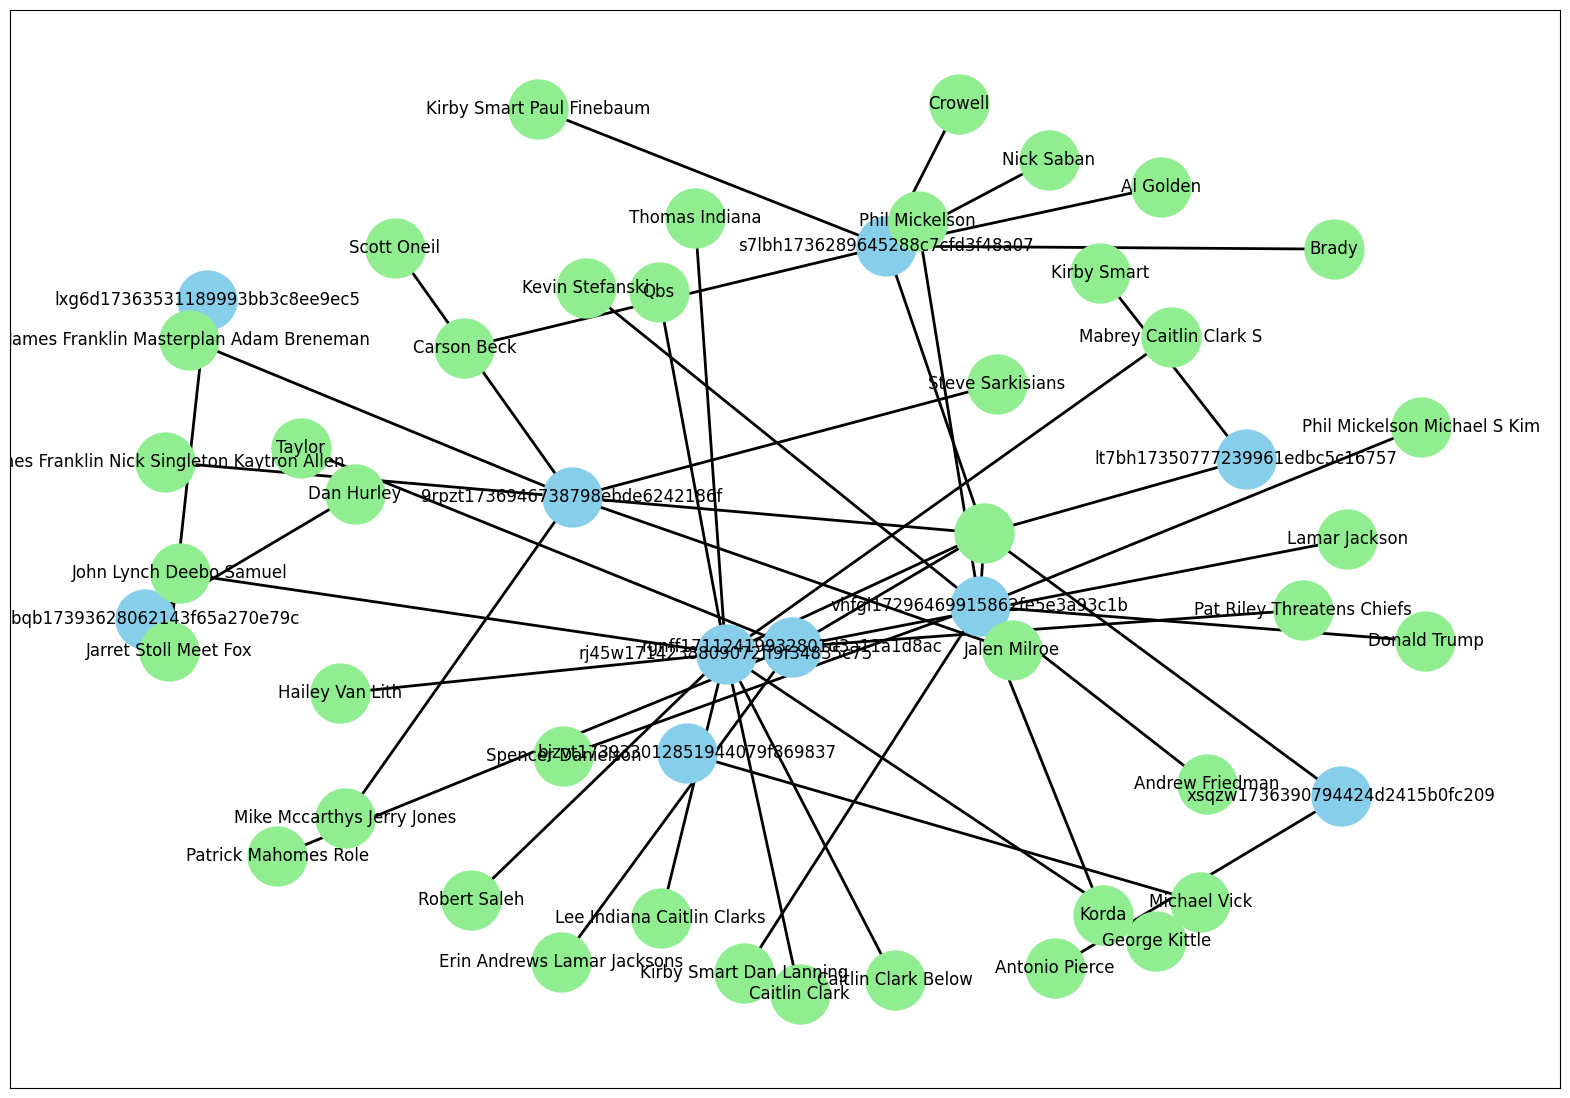

In [60]:
# Plot
plt.figure(figsize=(20, 14))  # BIG

#nodes
nx.draw_networkx_nodes(H, pos, nodelist=user_nodes, node_color='skyblue', node_size=1800, label='Users')
nx.draw_networkx_nodes(H, pos, nodelist=person_nodes, node_color='lightgreen', node_size=1800, label='People')

# edges
nx.draw_networkx_edges(H, pos, width=2)

# labels with nice font size
nx.draw_networkx_labels(H, pos, font_size=12, font_family='sans-serif')


In [61]:
# Download udf1 as a CSV file
udf1.to_csv('udf1.csv', index=False)
print("udf1.csv has been downloaded.")

# Download rdf1 as a CSV file
rdf1.to_csv('rdf1.csv', index=False)
print("rdf1.csv has been downloaded.")

udf1.csv has been downloaded.
rdf1.csv has been downloaded.
